In [94]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
from main.draw_tools.stacking import make_dict_data, make_dict_data_list

In [105]:

# base_file_loc =  '/media/jykim/T7/storage/01_recon/v2new_correct_test_pre_extract/'
base_file_loc =  '/media/jykim/T7/storage_b2/storage/MC15ri_skim_check/v2new_correct_test_pre_extract/'
base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Dstarp_CMS_p>2.8 && abs(Dstarp_Q-0.00593)<0.001 && abs(D0_COS_DALITZ)<0.5'
# base_filter = 'abs(D0_cosHel_0)<0.5 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && Dstarp_CMS_p>2.5 && abs(Dstarp_Q-0.00593)<0.0006 && Pi0_Prob<0.85'
# base_filter = ' Dstarp_isSignal!=1 && rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.90 && Dstarp_CMS_p>2.73 && abs(D0_cosHel_0)<0.8'

tree = 'omega'

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','gamma_E']
var = 'D0_M'

In [106]:
phigamma_0 = base_file_loc + 'sub00/output_*.root'
phigamma_1 = base_file_loc + 'sub01/output_*.root'
phigamma_2 = base_file_loc + 'sub02/output_*.root'
phigamma_3 = base_file_loc + 'sub03/output_*.root'
phigamma_4 = base_file_loc + 'sub04/output_*.root'

#base_filter=' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
base_filter = base_filter
varaiables = variables
tree=tree

pd_phigamma_0 = get_pd(file=phigamma_0, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_1 = get_pd(file=phigamma_1, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_2 = get_pd(file=phigamma_2, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_3 = get_pd(file=phigamma_3, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_4 = get_pd(file=phigamma_4, tree=tree,base_filter=base_filter,variables=variables)



In [107]:
pd_merged_phigamma = pd.concat([pd_phigamma_0, pd_phigamma_1, pd_phigamma_2, pd_phigamma_3, pd_phigamma_4])

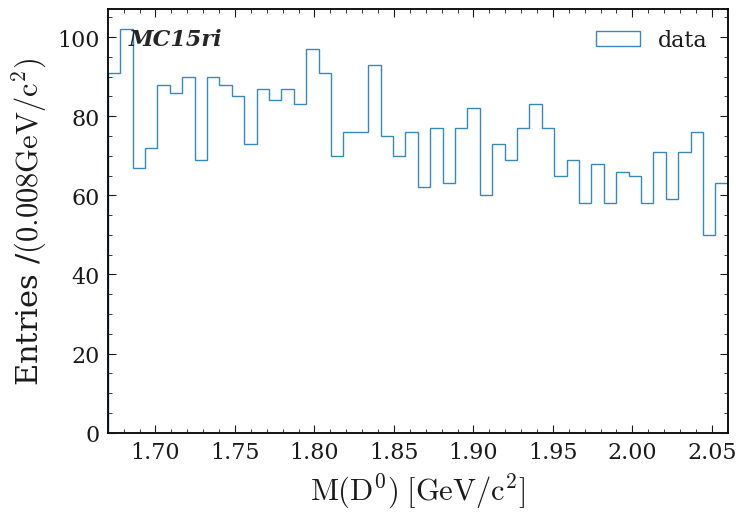

<Figure size 800x550 with 0 Axes>

In [108]:

var = 'D0_M'
#     for labeling in labels:
xrange=(1.67,2.06)
xbins = np.linspace(*xrange,51)
# plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
plt.hist(pd_merged_phigamma[var], bins=xbins, histtype='step', stacked=True,label='data')

#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')

ax = plt.gca()

# Shrink current axis by 20%
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width , box.height])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
plt.legend()

#     DRAW(pd_Dtokshortpi0, cut)

watermark(t="",logo="MC15ri")
ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

n, xe = np.histogram(pd_merged_phigamma[var], bins=50, range=(1.67,2.06))

ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.show()
plt.clf()

In [100]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_zernike/'
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext/'

base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
tree = 'omega'

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','gamma_E']
var = 'D0_M'

In [120]:
phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'
#base_filter=' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
base_filter = base_filter
varaiables = variables
tree=tree

pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)


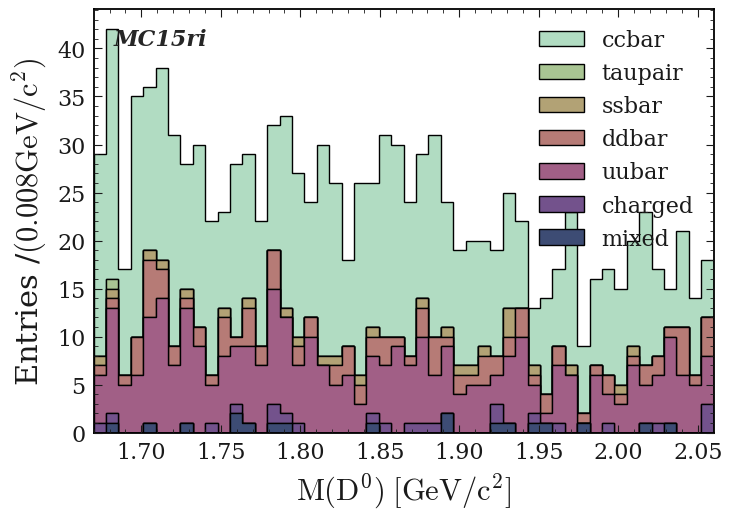

<Figure size 800x550 with 0 Axes>

In [121]:
Draw("D0_M")